In [1]:
import numpy as np
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from PIL import Image
import random
import math
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
training_data = np.load('./output/training_data.npy')
training_labels = np.load('./output/training_dists.npy')

#pad the training data matrix so it is 100x1024

#(500, 100, 1000, 1)

# zero_padding_array = np.zeros((500,100,600,1))

In [3]:
BRANCH_NUM = 100
SEQUENCE_LEN = 1000

OUTPUT_DIST_NUM = int((BRANCH_NUM + 1) * BRANCH_NUM / 2)

In [4]:
training_data.shape

(500, 100, 1000, 1)

In [5]:
training_labels.shape

(500, 5050)

In [6]:
# zero_padding_array.shape

In [7]:
# print(training_data.shape)
# training_data = np.concatenate([training_data, zero_padding_array], axis=2)
print(training_data.shape)

print(training_labels.shape)

samples_count = training_data.shape[0]

train_size = math.floor(0.85*training_data.shape[0])

shuffle_indices = random.sample(range(0, samples_count), samples_count)

indices_train = shuffle_indices[0:train_size]
indices_test = shuffle_indices[train_size:samples_count]

X_train = training_data[indices_train,:]
Y_train = training_labels[indices_train]

X_test = training_data[indices_test,:]
Y_test = training_labels[indices_test]

print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

print('Y_train.shape : ', Y_train.shape)
print('Y_test.shape : ', Y_test.shape)

np.save('./output/X_test.npy', X_test)
np.save('./output/Y_test.npy', Y_test)


(500, 100, 1000, 1)
(500, 5050)
X_train.shape :  (425, 100, 1000, 1)
X_test.shape :  (75, 100, 1000, 1)
Y_train.shape :  (425, 5050)
Y_test.shape :  (75, 5050)


In [8]:
model = Sequential()

# Layer 1
model.add(Conv2D(10, input_shape=X_train.shape[1:], kernel_size=(3,3), strides=(1,1)))
#model.add(Conv2D(48, input_shape=(400,11,1), kernel_size=(2,2), strides=(1,1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(5, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model.add(Conv2D(5, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
model.add(Conv2D(1, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5
model.add(Flatten())
model.add(Dense(OUTPUT_DIST_NUM, activation='relu'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 998, 10)       100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 998, 10)       40        
_________________________________________________________________
activation_1 (Activation)    (None, 98, 998, 10)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 499, 10)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 497, 5)        455       
_________________________________________________________________
batch_normalization_2 (Batch (None, 47, 497, 5)        20        
_________________________________________________________________
activation_2 (Activation)    (None, 47, 497, 5)       

In [10]:
# def customLossFunc(y_true, y_pred):
#     if not K.is_tensor(y_pred):
#         y_pred = K.constant(y_pred)
#     y_true = K.cast(y_true, y_pred.dtype)
# #     return K.mean(K.square(y_pred - y_true), axis=-1)
# #     return K.sum(K.square((y_pred - y_true)/y_true), axis=-1)
#     return K.sum(K.square(np.divide((y_pred - y_true), y_true)), axis=-1)

In [11]:
# (4) Compile 
#model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['accuracy'])

In [12]:
# (5) Train
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=16, epochs=1000, verbose=1)

model.save('./output/CNN_model_03.h5')

Train on 425 samples, validate on 75 samples
Epoch 1/1000
425/425 [==============================] - 11s 25ms/step - loss: 8240075.1864 - accuracy: 0.0024 - val_loss: 121.0344 - val_accuracy: 0.0000e+00
Epoch 2/1000
425/425 [==============================] - 9s 22ms/step - loss: 1426.4194 - accuracy: 0.0000e+00 - val_loss: 34.7498 - val_accuracy: 0.0000e+00
Epoch 3/1000
425/425 [==============================] - 9s 20ms/step - loss: 34.9035 - accuracy: 0.0000e+00 - val_loss: 34.7547 - val_accuracy: 0.0000e+00
Epoch 4/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8934 - accuracy: 0.0000e+00 - val_loss: 34.7801 - val_accuracy: 0.0000e+00
Epoch 5/1000
425/425 [==============================] - 12s 29ms/step - loss: 34.8798 - accuracy: 0.0000e+00 - val_loss: 34.8532 - val_accuracy: 0.0000e+00
Epoch 6/1000
425/425 [==============================] - 13s 30ms/step - loss: 34.8877 - accuracy: 0.0000e+00 - val_loss: 34.7999 - val_accuracy: 0.0000e+00
Epoch 7/1000
425/4

425/425 [==============================] - 10s 24ms/step - loss: 34.8394 - accuracy: 0.0024 - val_loss: 34.7090 - val_accuracy: 0.0000e+00
Epoch 54/1000
425/425 [==============================] - 12s 29ms/step - loss: 34.8382 - accuracy: 0.0024 - val_loss: 34.6866 - val_accuracy: 0.0000e+00
Epoch 55/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8369 - accuracy: 0.0000e+00 - val_loss: 34.6895 - val_accuracy: 0.0000e+00
Epoch 56/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8354 - accuracy: 0.0024 - val_loss: 34.6972 - val_accuracy: 0.0000e+00
Epoch 57/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8356 - accuracy: 0.0000e+00 - val_loss: 34.6945 - val_accuracy: 0.0000e+00
Epoch 58/1000
425/425 [==============================] - 8s 20ms/step - loss: 34.8386 - accuracy: 0.0024 - val_loss: 34.6907 - val_accuracy: 0.0000e+00
Epoch 59/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8344 - ac

Epoch 106/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8329 - accuracy: 0.0000e+00 - val_loss: 34.7250 - val_accuracy: 0.0000e+00
Epoch 107/1000
425/425 [==============================] - 10s 22ms/step - loss: 34.8360 - accuracy: 0.0000e+00 - val_loss: 34.7042 - val_accuracy: 0.0000e+00
Epoch 108/1000
425/425 [==============================] - 8s 19ms/step - loss: 34.8386 - accuracy: 0.0000e+00 - val_loss: 34.7013 - val_accuracy: 0.0000e+00
Epoch 109/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8347 - accuracy: 0.0000e+00 - val_loss: 34.6982 - val_accuracy: 0.0000e+00
Epoch 110/1000
425/425 [==============================] - 12s 27ms/step - loss: 34.8334 - accuracy: 0.0000e+00 - val_loss: 34.6820 - val_accuracy: 0.0000e+00
Epoch 111/1000
425/425 [==============================] - 13s 31ms/step - loss: 34.8369 - accuracy: 0.0000e+00 - val_loss: 34.6872 - val_accuracy: 0.0000e+00
Epoch 112/1000
425/425 [==============================

425/425 [==============================] - 9s 21ms/step - loss: 34.8308 - accuracy: 0.0000e+00 - val_loss: 34.7190 - val_accuracy: 0.0000e+00
Epoch 159/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8297 - accuracy: 0.0000e+00 - val_loss: 34.7172 - val_accuracy: 0.0000e+00
Epoch 160/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8316 - accuracy: 0.0000e+00 - val_loss: 34.7007 - val_accuracy: 0.0000e+00
Epoch 161/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8328 - accuracy: 0.0000e+00 - val_loss: 34.6949 - val_accuracy: 0.0000e+00
Epoch 162/1000
425/425 [==============================] - 10s 24ms/step - loss: 34.8314 - accuracy: 0.0000e+00 - val_loss: 34.6954 - val_accuracy: 0.0000e+00
Epoch 163/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8289 - accuracy: 0.0000e+00 - val_loss: 34.7013 - val_accuracy: 0.0000e+00
Epoch 164/1000
425/425 [==============================] - 9s 21ms/step -

425/425 [==============================] - 13s 29ms/step - loss: 34.8268 - accuracy: 0.0000e+00 - val_loss: 34.6916 - val_accuracy: 0.0000e+00
Epoch 211/1000
425/425 [==============================] - 12s 28ms/step - loss: 34.8254 - accuracy: 0.0000e+00 - val_loss: 34.7016 - val_accuracy: 0.0000e+00
Epoch 212/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8277 - accuracy: 0.0000e+00 - val_loss: 34.6891 - val_accuracy: 0.0000e+00
Epoch 213/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8300 - accuracy: 0.0000e+00 - val_loss: 34.7143 - val_accuracy: 0.0000e+00
Epoch 214/1000
425/425 [==============================] - 10s 24ms/step - loss: 34.8279 - accuracy: 0.0024 - val_loss: 34.6935 - val_accuracy: 0.0000e+00
Epoch 215/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8268 - accuracy: 0.0000e+00 - val_loss: 34.6879 - val_accuracy: 0.0000e+00
Epoch 216/1000
425/425 [==============================] - 9s 22ms/step -

425/425 [==============================] - 9s 22ms/step - loss: 34.8271 - accuracy: 0.0024 - val_loss: 34.7140 - val_accuracy: 0.0000e+00
Epoch 263/1000
425/425 [==============================] - 8s 19ms/step - loss: 34.8290 - accuracy: 0.0000e+00 - val_loss: 34.7022 - val_accuracy: 0.0000e+00
Epoch 264/1000
425/425 [==============================] - 12s 28ms/step - loss: 34.8302 - accuracy: 0.0000e+00 - val_loss: 34.7050 - val_accuracy: 0.0000e+00
Epoch 265/1000
425/425 [==============================] - 14s 33ms/step - loss: 34.8290 - accuracy: 0.0000e+00 - val_loss: 34.7096 - val_accuracy: 0.0000e+00
Epoch 266/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8279 - accuracy: 0.0000e+00 - val_loss: 34.6972 - val_accuracy: 0.0000e+00
Epoch 267/1000
425/425 [==============================] - 12s 29ms/step - loss: 34.8303 - accuracy: 0.0000e+00 - val_loss: 34.6987 - val_accuracy: 0.0000e+00
Epoch 268/1000
425/425 [==============================] - 10s 23ms/step -

425/425 [==============================] - 9s 22ms/step - loss: 34.8244 - accuracy: 0.0000e+00 - val_loss: 34.7021 - val_accuracy: 0.0000e+00
Epoch 315/1000
425/425 [==============================] - 13s 30ms/step - loss: 34.8259 - accuracy: 0.0000e+00 - val_loss: 34.6911 - val_accuracy: 0.0000e+00
Epoch 316/1000
425/425 [==============================] - 12s 29ms/step - loss: 34.8323 - accuracy: 0.0000e+00 - val_loss: 34.7153 - val_accuracy: 0.0000e+00
Epoch 317/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8258 - accuracy: 0.0000e+00 - val_loss: 34.7115 - val_accuracy: 0.0000e+00
Epoch 318/1000
425/425 [==============================] - 12s 28ms/step - loss: 34.8274 - accuracy: 0.0024 - val_loss: 34.7164 - val_accuracy: 0.0000e+00
Epoch 319/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8246 - accuracy: 0.0024 - val_loss: 34.6973 - val_accuracy: 0.0000e+00
Epoch 320/1000
425/425 [==============================] - 9s 21ms/step - loss

425/425 [==============================] - 9s 22ms/step - loss: 34.8244 - accuracy: 0.0024 - val_loss: 34.6931 - val_accuracy: 0.0000e+00
Epoch 367/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8252 - accuracy: 0.0000e+00 - val_loss: 34.6994 - val_accuracy: 0.0000e+00
Epoch 368/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8243 - accuracy: 0.0024 - val_loss: 34.7020 - val_accuracy: 0.0000e+00
Epoch 369/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8236 - accuracy: 0.0000e+00 - val_loss: 34.7084 - val_accuracy: 0.0000e+00
Epoch 370/1000
425/425 [==============================] - 13s 30ms/step - loss: 34.8247 - accuracy: 0.0000e+00 - val_loss: 34.7099 - val_accuracy: 0.0000e+00
Epoch 371/1000
425/425 [==============================] - 13s 30ms/step - loss: 34.8310 - accuracy: 0.0000e+00 - val_loss: 34.7273 - val_accuracy: 0.0000e+00
Epoch 372/1000
425/425 [==============================] - 10s 23ms/step - loss

425/425 [==============================] - 9s 22ms/step - loss: 34.8248 - accuracy: 0.0000e+00 - val_loss: 34.7100 - val_accuracy: 0.0000e+00
Epoch 419/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8281 - accuracy: 0.0024 - val_loss: 34.7100 - val_accuracy: 0.0000e+00
Epoch 420/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8254 - accuracy: 0.0000e+00 - val_loss: 34.6936 - val_accuracy: 0.0000e+00
Epoch 421/1000
425/425 [==============================] - 8s 19ms/step - loss: 34.8234 - accuracy: 0.0000e+00 - val_loss: 34.7085 - val_accuracy: 0.0000e+00
Epoch 422/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8232 - accuracy: 0.0000e+00 - val_loss: 34.6938 - val_accuracy: 0.0000e+00
Epoch 423/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8263 - accuracy: 0.0000e+00 - val_loss: 34.7015 - val_accuracy: 0.0000e+00
Epoch 424/1000
425/425 [==============================] - 9s 22ms/step - los

425/425 [==============================] - 9s 22ms/step - loss: 34.8246 - accuracy: 0.0000e+00 - val_loss: 34.7122 - val_accuracy: 0.0000e+00
Epoch 471/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8266 - accuracy: 0.0000e+00 - val_loss: 34.7321 - val_accuracy: 0.0000e+00
Epoch 472/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8264 - accuracy: 0.0000e+00 - val_loss: 34.7193 - val_accuracy: 0.0000e+00
Epoch 473/1000
425/425 [==============================] - 11s 27ms/step - loss: 38.7009 - accuracy: 0.0000e+00 - val_loss: 34.6988 - val_accuracy: 0.0000e+00
Epoch 474/1000
425/425 [==============================] - 12s 29ms/step - loss: 34.8244 - accuracy: 0.0000e+00 - val_loss: 34.7013 - val_accuracy: 0.0000e+00
Epoch 475/1000
425/425 [==============================] - 13s 30ms/step - loss: 34.8258 - accuracy: 0.0000e+00 - val_loss: 34.6916 - val_accuracy: 0.0000e+00
Epoch 476/1000
425/425 [==============================] - 10s 23ms/ste

425/425 [==============================] - 9s 21ms/step - loss: 34.8173 - accuracy: 0.0000e+00 - val_loss: 34.7016 - val_accuracy: 0.0000e+00
Epoch 523/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8207 - accuracy: 0.0000e+00 - val_loss: 34.7157 - val_accuracy: 0.0000e+00
Epoch 524/1000
425/425 [==============================] - 8s 20ms/step - loss: 34.8171 - accuracy: 0.0000e+00 - val_loss: 34.7240 - val_accuracy: 0.0000e+00
Epoch 525/1000
425/425 [==============================] - 11s 27ms/step - loss: 34.8182 - accuracy: 0.0000e+00 - val_loss: 34.7038 - val_accuracy: 0.0000e+00
Epoch 526/1000
425/425 [==============================] - 8s 19ms/step - loss: 34.8275 - accuracy: 0.0000e+00 - val_loss: 34.7159 - val_accuracy: 0.0000e+00
Epoch 527/1000
425/425 [==============================] - 11s 25ms/step - loss: 34.8208 - accuracy: 0.0000e+00 - val_loss: 34.6986 - val_accuracy: 0.0000e+00
Epoch 528/1000
425/425 [==============================] - 14s 33ms/step

425/425 [==============================] - 9s 22ms/step - loss: 34.8235 - accuracy: 0.0000e+00 - val_loss: 34.7050 - val_accuracy: 0.0000e+00
Epoch 575/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8216 - accuracy: 0.0024 - val_loss: 34.7013 - val_accuracy: 0.0000e+00
Epoch 576/1000
425/425 [==============================] - 8s 20ms/step - loss: 34.8208 - accuracy: 0.0024 - val_loss: 34.7079 - val_accuracy: 0.0000e+00
Epoch 577/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8205 - accuracy: 0.0000e+00 - val_loss: 34.7120 - val_accuracy: 0.0000e+00
Epoch 578/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8209 - accuracy: 0.0000e+00 - val_loss: 34.7037 - val_accuracy: 0.0000e+00
Epoch 579/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8237 - accuracy: 0.0024 - val_loss: 34.7126 - val_accuracy: 0.0000e+00
Epoch 580/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.82

425/425 [==============================] - 9s 21ms/step - loss: 34.8219 - accuracy: 0.0000e+00 - val_loss: 34.6951 - val_accuracy: 0.0000e+00
Epoch 627/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8203 - accuracy: 0.0000e+00 - val_loss: 34.7175 - val_accuracy: 0.0000e+00
Epoch 628/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8187 - accuracy: 0.0000e+00 - val_loss: 34.7027 - val_accuracy: 0.0000e+00
Epoch 629/1000
425/425 [==============================] - 10s 22ms/step - loss: 34.8162 - accuracy: 0.0000e+00 - val_loss: 34.7029 - val_accuracy: 0.0000e+00
Epoch 630/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8150 - accuracy: 0.0000e+00 - val_loss: 34.7038 - val_accuracy: 0.0000e+00
Epoch 631/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8166 - accuracy: 0.0000e+00 - val_loss: 34.6998 - val_accuracy: 0.0000e+00
Epoch 632/1000
425/425 [==============================] - 9s 22ms/step

425/425 [==============================] - 12s 29ms/step - loss: 34.8617 - accuracy: 0.0024 - val_loss: 34.7040 - val_accuracy: 0.0000e+00
Epoch 679/1000
425/425 [==============================] - 13s 31ms/step - loss: 78.8477 - accuracy: 0.0000e+00 - val_loss: 34.7346 - val_accuracy: 0.0000e+00
Epoch 680/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8638 - accuracy: 0.0000e+00 - val_loss: 34.7290 - val_accuracy: 0.0000e+00
Epoch 681/1000
425/425 [==============================] - 10s 24ms/step - loss: 34.8622 - accuracy: 0.0000e+00 - val_loss: 34.7208 - val_accuracy: 0.0000e+00
Epoch 682/1000
425/425 [==============================] - 11s 26ms/step - loss: 34.8620 - accuracy: 0.0000e+00 - val_loss: 34.7105 - val_accuracy: 0.0000e+00
Epoch 683/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8624 - accuracy: 0.0000e+00 - val_loss: 34.7117 - val_accuracy: 0.0000e+00
Epoch 684/1000
425/425 [==============================] - 9s 20ms/step 

425/425 [==============================] - 9s 21ms/step - loss: 34.8500 - accuracy: 0.0000e+00 - val_loss: 34.7033 - val_accuracy: 0.0000e+00
Epoch 731/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8505 - accuracy: 0.0000e+00 - val_loss: 34.6989 - val_accuracy: 0.0000e+00
Epoch 732/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8488 - accuracy: 0.0000e+00 - val_loss: 34.7160 - val_accuracy: 0.0000e+00
Epoch 733/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8467 - accuracy: 0.0000e+00 - val_loss: 34.7288 - val_accuracy: 0.0000e+00
Epoch 734/1000
425/425 [==============================] - 10s 24ms/step - loss: 34.8499 - accuracy: 0.0024 - val_loss: 34.7107 - val_accuracy: 0.0000e+00
Epoch 735/1000
425/425 [==============================] - 10s 22ms/step - loss: 34.8480 - accuracy: 0.0000e+00 - val_loss: 34.7204 - val_accuracy: 0.0000e+00
Epoch 736/1000
425/425 [==============================] - 11s 27ms/step - 

425/425 [==============================] - 9s 21ms/step - loss: 34.8372 - accuracy: 0.0000e+00 - val_loss: 34.7132 - val_accuracy: 0.0000e+00
Epoch 783/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8354 - accuracy: 0.0000e+00 - val_loss: 34.7207 - val_accuracy: 0.0000e+00
Epoch 784/1000
425/425 [==============================] - 8s 20ms/step - loss: 34.8353 - accuracy: 0.0000e+00 - val_loss: 34.7053 - val_accuracy: 0.0000e+00
Epoch 785/1000
425/425 [==============================] - 11s 25ms/step - loss: 34.8347 - accuracy: 0.0000e+00 - val_loss: 34.7296 - val_accuracy: 0.0000e+00
Epoch 786/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8356 - accuracy: 0.0024 - val_loss: 34.7341 - val_accuracy: 0.0000e+00
Epoch 787/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8354 - accuracy: 0.0000e+00 - val_loss: 34.7107 - val_accuracy: 0.0000e+00
Epoch 788/1000
425/425 [==============================] - 9s 21ms/step - los

425/425 [==============================] - 9s 22ms/step - loss: 34.8414 - accuracy: 0.0000e+00 - val_loss: 34.7140 - val_accuracy: 0.0000e+00
Epoch 835/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8407 - accuracy: 0.0000e+00 - val_loss: 34.6827 - val_accuracy: 0.0000e+00
Epoch 836/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8427 - accuracy: 0.0047 - val_loss: 34.7066 - val_accuracy: 0.0000e+00
Epoch 837/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8414 - accuracy: 0.0024 - val_loss: 34.6842 - val_accuracy: 0.0000e+00
Epoch 838/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8405 - accuracy: 0.0000e+00 - val_loss: 34.6948 - val_accuracy: 0.0000e+00
Epoch 839/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8403 - accuracy: 0.0024 - val_loss: 34.6910 - val_accuracy: 0.0000e+00
Epoch 840/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.842

425/425 [==============================] - 11s 26ms/step - loss: 34.8421 - accuracy: 0.0000e+00 - val_loss: 34.6861 - val_accuracy: 0.0000e+00
Epoch 887/1000
425/425 [==============================] - 11s 25ms/step - loss: 34.8375 - accuracy: 0.0000e+00 - val_loss: 34.6794 - val_accuracy: 0.0000e+00
Epoch 888/1000
425/425 [==============================] - 14s 34ms/step - loss: 34.8358 - accuracy: 0.0024 - val_loss: 34.6984 - val_accuracy: 0.0000e+00
Epoch 889/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8365 - accuracy: 0.0000e+00 - val_loss: 34.6850 - val_accuracy: 0.0000e+00
Epoch 890/1000
425/425 [==============================] - 13s 30ms/step - loss: 34.8374 - accuracy: 0.0000e+00 - val_loss: 34.6981 - val_accuracy: 0.0000e+00
Epoch 891/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8374 - accuracy: 0.0000e+00 - val_loss: 34.6855 - val_accuracy: 0.0000e+00
Epoch 892/1000
425/425 [==============================] - 9s 21ms/step -

Epoch 939/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8353 - accuracy: 0.0000e+00 - val_loss: 34.6865 - val_accuracy: 0.0000e+00
Epoch 940/1000
425/425 [==============================] - 9s 21ms/step - loss: 34.8335 - accuracy: 0.0024 - val_loss: 34.7011 - val_accuracy: 0.0000e+00
Epoch 941/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8358 - accuracy: 0.0000e+00 - val_loss: 34.7120 - val_accuracy: 0.0000e+00
Epoch 942/1000
425/425 [==============================] - 13s 32ms/step - loss: 34.8340 - accuracy: 0.0024 - val_loss: 34.6942 - val_accuracy: 0.0000e+00
Epoch 943/1000
425/425 [==============================] - 10s 23ms/step - loss: 34.8362 - accuracy: 0.0024 - val_loss: 34.6980 - val_accuracy: 0.0000e+00
Epoch 944/1000
425/425 [==============================] - 12s 27ms/step - loss: 34.8339 - accuracy: 0.0024 - val_loss: 34.6883 - val_accuracy: 0.0000e+00
Epoch 945/1000
425/425 [==============================] - 10s 24ms/ste

425/425 [==============================] - 9s 22ms/step - loss: 34.8326 - accuracy: 0.0000e+00 - val_loss: 34.6995 - val_accuracy: 0.0000e+00
Epoch 992/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8327 - accuracy: 0.0000e+00 - val_loss: 34.7079 - val_accuracy: 0.0000e+00
Epoch 993/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8320 - accuracy: 0.0000e+00 - val_loss: 34.6968 - val_accuracy: 0.0000e+00
Epoch 994/1000
425/425 [==============================] - 8s 19ms/step - loss: 34.8329 - accuracy: 0.0000e+00 - val_loss: 34.6914 - val_accuracy: 0.0000e+00
Epoch 995/1000
425/425 [==============================] - 10s 24ms/step - loss: 34.8331 - accuracy: 0.0024 - val_loss: 34.7010 - val_accuracy: 0.0000e+00
Epoch 996/1000
425/425 [==============================] - 9s 22ms/step - loss: 34.8335 - accuracy: 0.0000e+00 - val_loss: 34.6885 - val_accuracy: 0.0000e+00
Epoch 997/1000
425/425 [==============================] - 9s 21ms/step - los

In [13]:
train_result = model.evaluate(X_train, Y_train)
test_result = model.evaluate(X_test, Y_test)
print("Train Acc: ", train_result)
print("Test Acc: ", test_result)

75/75 [==============================] - 0s 5ms/step
Train Acc:  [34.83234534768497, 0.002352941082790494]
Test Acc:  [34.71007123311361, 0.0]


## Load the Model

In [14]:
model = keras.models.load_model('./output/CNN_model_03.h5')

## X_train plot

In [15]:
X_train_results = model.predict(X_train)

In [16]:
train_show_index = 10

Text(0, 0.5, 'Distance Matrix Value')

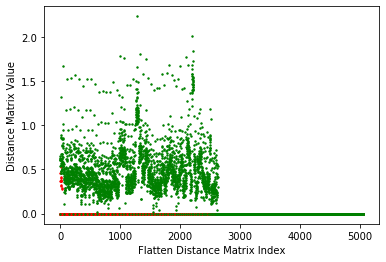

In [17]:
plt.scatter(range(X_train_results[train_show_index].shape[0]), X_train_results[train_show_index], c='r', s = 2)
plt.scatter(range(Y_train[train_show_index].shape[0]), Y_train[train_show_index], c='g', s = 2)
plt.xlabel ('Flatten Distance Matrix Index')
plt.ylabel ('Distance Matrix Value')

<function matplotlib.pyplot.show(*args, **kw)>

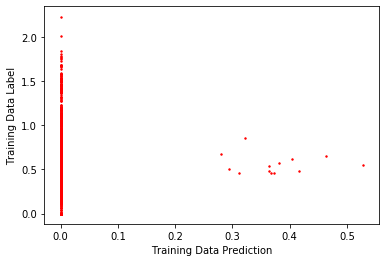

In [18]:
plt.scatter(X_train_results[train_show_index], Y_train[train_show_index], c='r', s = 2)
plt.xlabel ('Training Data Prediction')
plt.ylabel ('Training Data Label')
plt.show

In [19]:
X_train_results_resh= X_train_results.reshape((1, 425*5050))
Y_train_resh = Y_train.reshape((1, 425*5050))

<function matplotlib.pyplot.show(*args, **kw)>

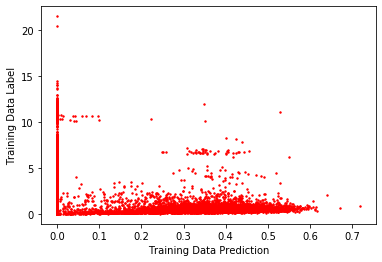

In [20]:
plt.scatter(X_train_results_resh, Y_train_resh, c='r', s = 2)
plt.xlabel ('Training Data Prediction')
plt.ylabel ('Training Data Label')
plt.show

## X_test plot

In [21]:
X_test_results = model.predict(X_test)

In [22]:
test_show_index = 10

Text(0, 0.5, 'Distance Matrix Value')

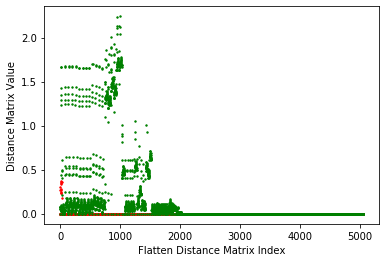

In [23]:
plt.scatter(range(X_test_results[test_show_index].shape[0]), X_test_results[test_show_index], c='r', s = 2)
plt.scatter(range(Y_test[test_show_index].shape[0]), Y_test[test_show_index], c='g', s = 2)
plt.xlabel ('Flatten Distance Matrix Index')
plt.ylabel ('Distance Matrix Value')

<function matplotlib.pyplot.show(*args, **kw)>

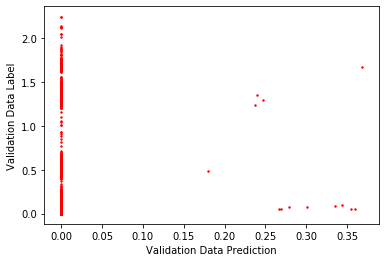

In [24]:
plt.scatter(X_test_results[train_show_index], Y_test[train_show_index], c='r', s = 2)
plt.xlabel ('Validation Data Prediction')
plt.ylabel ('Validation Data Label')
plt.show

In [25]:
X_test_results_resh= X_test_results.reshape((1, 75*5050))
Y_test_resh = Y_test.reshape((1, 75*5050))

<function matplotlib.pyplot.show(*args, **kw)>

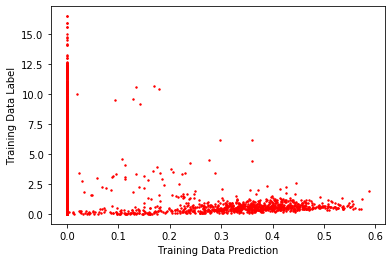

In [26]:
plt.scatter(X_test_results_resh, Y_test_resh, c='r', s = 2)
plt.xlabel ('Training Data Prediction')
plt.ylabel ('Training Data Label')
plt.show

## Plot Loss 

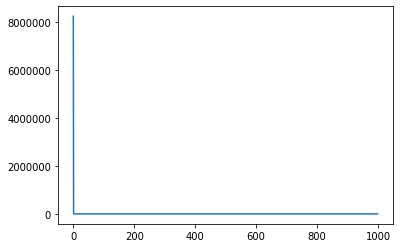

In [27]:
plt.plot(history.history['loss'])
plt.show()